#  EDA on wish E-commerce Dataset

## Importing the libraries

In [1]:
import pandas as pd
import os
import glob
import numpy as np
import datetime
import random
import string
from fuzzywuzzy import fuzz,process
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

C:\Users\kp728\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## Importing the csv files

In [3]:
# Reading all the 315 product category files
all_files = glob.glob('*')

#Setting the path
path = "C:/Users/kp728/Documents/Sem3/CPSC/Project/Data/"
os.chdir(path)

#creating the new dataframe
new_df = pd.DataFrame()

#Creating the new column as Product_Name and reading the indiviual csv file using for loop

file_individual = (pd.read_csv(file).assign(Product_Name = file.split('.')[0]) for file in all_files)
#Concating the CSV file

new_df = pd.concat(file_individual, ignore_index=False)

df = pd.DataFrame(new_df)
df.head()

,title,title_orig,discount_price,discount_price_currency,retail_price,retail_price_currency,discount_price_in_original_currency,nb_cart_orders_approx,nb_units_purchased_approx,uses_ad_boosts,...,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,Product_Name
0,100ML 24K Or Soins de La Peau Anti-Vieillissem...,100ML 24K Gold Skin Care Anti Aging Collagen H...,10.0,EUR,10.0,EUR,12.00,10.0,NaN,NaN,...,"(57,021 notes)",57021.0,4.300854,57b327ca18c55618cdc64f8f,NaN,NaN,https://www.wish.com/c/5d84a1d1dda3ef0f306dfc50,https://canary.contestimg.wish.com/api/webimag...,5d84a1d1dda3ef0f306dfc50,aging
1,Anti-Ageing Cream Global Dna Postquam,Anti-Ageing Cream Global Dna Postquam,60.0,EUR,60.0,EUR,71.87,0.0,NaN,NaN,...,100 % avis positifs (3 notes),3.0,4.666667,5f7c9792052776004bc5a3c6,NaN,NaN,https://www.wish.com/c/60525aa5e19de72696b5ecdf,https://canary.contestimg.wish.com/api/webimag...,60525aa5e19de72696b5ecdf,aging
2,Nature Queen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.wish.com/c/5eda260090b8a631048f8c03,NaN,5eda260090b8a631048f8c03,aging
3,3D V-line Face-Lift raffermissant la peau Anti...,3D V-Line Face-Lift Firming Skin Anti Aging do...,5.0,EUR,5.0,EUR,5.00,1000.0,NaN,NaN,...,92 % avis positifs (287 notes),287.0,4.372822,5ebfa16329e7860c32d8634d,NaN,NaN,https://www.wish.com/c/5f327be61b746c003ff583ac,https://canary.contestimg.wish.com/api/webimag...,5f327be61b746c003ff583ac,aging
4,Essence d'escargot crème pour le visage acide ...,Snail Essence Face Cream Hyaluronic Acid Anti-...,7.0,EUR,7.0,EUR,8.00,10.0,NaN,NaN,...,88 % avis positifs (200 notes),200.0,4.245000,5e13450f29e7864c03e95ff5,NaN,NaN,https://www.wish.com/c/5fed3d117ef51e7251f7f726,https://canary.contestimg.wish.com/api/webimag...,5fed3d117ef51e7251f7f726,aging


## Getting to know the data

In [4]:
#Function to know the summary of data
def data_info(data):
    rows=len(data)
    cols=len(data.columns)
    cols_name=data.columns
    print("Number of rows in dataset: {}\nNumber of columns in dataset: {}\nColumns in dataset:\n{}".format(rows,cols,cols_name))
    return data.head(10)

In [5]:
data_info(df)

Number of rows in dataset: 280011
Number of columns in dataset: 45
Columns in dataset:
Index(['title', 'title_orig', 'discount_price', 'discount_price_currency',
       'retail_price', 'retail_price_currency',
       'discount_price_in_original_currency', 'nb_cart_orders_approx',
       'nb_units_purchased_approx', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'm

,title,title_orig,discount_price,discount_price_currency,retail_price,retail_price_currency,discount_price_in_original_currency,nb_cart_orders_approx,nb_units_purchased_approx,uses_ad_boosts,...,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,Product_Name
0,100ML 24K Or Soins de La Peau Anti-Vieillissem...,100ML 24K Gold Skin Care Anti Aging Collagen H...,10.00,EUR,10.0,EUR,12.00,10.0,NaN,NaN,...,"(57,021 notes)",57021.0,4.300854,57b327ca18c55618cdc64f8f,NaN,NaN,https://www.wish.com/c/5d84a1d1dda3ef0f306dfc50,https://canary.contestimg.wish.com/api/webimag...,5d84a1d1dda3ef0f306dfc50,aging
1,Anti-Ageing Cream Global Dna Postquam,Anti-Ageing Cream Global Dna Postquam,60.00,EUR,60.0,EUR,71.87,0.0,NaN,NaN,...,100 % avis positifs (3 notes),3.0,4.666667,5f7c9792052776004bc5a3c6,NaN,NaN,https://www.wish.com/c/60525aa5e19de72696b5ecdf,https://canary.contestimg.wish.com/api/webimag...,60525aa5e19de72696b5ecdf,aging
2,Nature Queen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.wish.com/c/5eda260090b8a631048f8c03,NaN,5eda260090b8a631048f8c03,aging
3,3D V-line Face-Lift raffermissant la peau Anti...,3D V-Line Face-Lift Firming Skin Anti Aging do...,5.00,EUR,5.0,EUR,5.00,1000.0,NaN,NaN,...,92 % avis positifs (287 notes),287.0,4.372822,5ebfa16329e7860c32d8634d,NaN,NaN,https://www.wish.com/c/5f327be61b746c003ff583ac,https://canary.contestimg.wish.com/api/webimag...,5f327be61b746c003ff583ac,aging
4,Essence d'escargot crème pour le visage acide ...,Snail Essence Face Cream Hyaluronic Acid Anti-...,7.00,EUR,7.0,EUR,8.00,10.0,NaN,NaN,...,88 % avis positifs (200 notes),200.0,4.245000,5e13450f29e7864c03e95ff5,NaN,NaN,https://www.wish.com/c/5fed3d117ef51e7251f7f726,https://canary.contestimg.wish.com/api/webimag...,5fed3d117ef51e7251f7f726,aging
5,Elizabeth Arden Prevage Anti-aging Eye Serum 15ml,Elizabeth Arden Prevage Anti-aging Eye Serum 15ml,87.00,EUR,87.0,EUR,104.58,0.0,NaN,NaN,...,96 % avis positifs (46 notes),46.0,4.782609,5fb67a1f57173fbfb9cc1c31,NaN,NaN,https://www.wish.com/c/603907a8af2b78448d6fd566,https://canary.contestimg.wish.com/api/webimag...,603907a8af2b78448d6fd566,aging
6,Laneige,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.wish.com/c/5f6b2ae090b8a611b2cbbf06,NaN,5f6b2ae090b8a611b2cbbf06,aging
7,Sérum de rétinol 30ML de Neutriherbs Ingrédien...,30ML Retinol Serum von Neutriherbs 100% natürl...,4.72,EUR,92.0,EUR,5.72,10.0,NaN,NaN,...,"75 % avis positifs (1,444 notes)",1444.0,3.642659,5d3ee783e4b65d3ac01f14a2,NaN,NaN,https://www.wish.com/c/5daaafe153a6c60bc86fbc1f,https://canary.contestimg.wish.com/api/webimag...,5daaafe153a6c60bc86fbc1f,aging
8,Pond'S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.wish.com/c/5eec9b09eb31f9cc968f2a64,NaN,5eec9b09eb31f9cc968f2a64,aging
9,L'Oreal Expert Professionnel EXCELLENCE AGE PE...,L'Oreal Expert Professionnel EXCELLENCE AGE PE...,21.00,EUR,21.0,EUR,25.00,1.0,NaN,NaN,...,"92 % avis positifs (28,407 notes)",28407.0,4.455240,589a8e22fb7070514df43a2a,NaN,NaN,https://www.wish.com/c/59b76a6cf581d13caf2661e8,https://canary.contestimg.wish.com/api/webimag...,59b76a6cf581d13caf2661e8,aging


## Getting the information for columns

In [6]:
#Creating the function to get the column information

def col_info(data, col_ids=None, truncate=False):
    if col_ids is None:
        col_ids = range(0, data.shape[1])
    if type(col_ids[0]) == str:
        col_indices = [] 
        for col in col_ids: 
            index = data.columns.get_loc(col)
            col_indices.append(index)
    else: 
        col_indices = col_ids
    col_indices_to_use = col_indices
    if truncate == True:
        col_indices_to_use = col_indices[:5] 
    for col in col_indices_to_use: 
        uniques_arr = data.iloc[:,col].unique()
        nb_uniques = len(data.iloc[:,col].unique())
        if nb_uniques < 2:
            print("\033[1m", data.columns[col], "\033[0m:", data.iloc[:,col].dtype, ":", nb_uniques, "level")
        else:
            print("\033[1m", data.columns[col], "\033[0m:", data.iloc[:,col].dtype, ":", nb_uniques, "levels")
        values_list = []
        total_length = len(str(uniques_arr[0]))
        total_values = 0
        for value in range(0, nb_uniques):
            if ((total_length < 50) & (total_values < 12)):
                values_list.append(uniques_arr[value])
                total_length += len(str(uniques_arr[value]))
                total_values += 1
            else:
                print(values_list, "...\n")
                break
        if ((total_length < 50) & (total_values < 12)):
            print(values_list, "\n")
    if ((truncate == True) & (len(col_indices) > len(col_indices_to_use))):
        print("... OUTPUT TRUNCATED ... remove truncate=True to display info about all columns")

In [7]:
col_info(df)

 title : object : 181474 levels
[] ...

 title_orig : object : 171446 levels
[] ...

 discount_price : float64 : 2056 levels
[10.0, 60.0, nan, 5.0, 7.0, 87.0, 4.72, 21.0, 9.0, 3.87, 3.0, 12.0] ...

 discount_price_currency : object : 4 levels
['EUR', nan, 'USD', 'CHF'] 

 retail_price : float64 : 2067 levels
[10.0, 60.0, nan, 5.0, 7.0, 87.0, 92.0, 21.0, 33.0, 83.0, 3.0, 12.0] ...

 retail_price_currency : object : 4 levels
['EUR', nan, 'USD', 'CHF'] 

 discount_price_in_original_currency : float64 : 5800 levels
[12.0, 71.87, nan, 5.0, 8.0, 104.58, 5.72, 25.0, 11.0, 10.43, 4.69, 3.0] ...

 nb_cart_orders_approx : float64 : 18 levels
[10.0, 0.0, nan, 1000.0, 1.0, 3.0, 2.0, 10000.0, 7.0, 20000.0, 5000.0] ...

 nb_units_purchased_approx : float64 : 1 level
[nan] 

 uses_ad_boosts : float64 : 1 level
[nan] 

 rating : float64 : 34193 levels
[4.473684210526316, 5.0, nan, 4.190476190476191] ...

 rating_count : float64 : 5085 levels
[19.0, 0.0, nan, 168.0, 1.0, 20.0, 7.0, 338.0, 2.0, 54.0, 50

## Data Formatting

### Creating the new column date

In [8]:
df["Fake_date"] = np.random.choice(pd.date_range('2020-01', '2021-12'), len(df))


In [9]:
df.head()

,title,title_orig,discount_price,discount_price_currency,retail_price,retail_price_currency,discount_price_in_original_currency,nb_cart_orders_approx,nb_units_purchased_approx,uses_ad_boosts,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,Product_Name,Fake_date
0,100ML 24K Or Soins de La Peau Anti-Vieillissem...,100ML 24K Gold Skin Care Anti Aging Collagen H...,10.0,EUR,10.0,EUR,12.00,10.0,NaN,NaN,...,57021.0,4.300854,57b327ca18c55618cdc64f8f,NaN,NaN,https://www.wish.com/c/5d84a1d1dda3ef0f306dfc50,https://canary.contestimg.wish.com/api/webimag...,5d84a1d1dda3ef0f306dfc50,aging,2020-02-09
1,Anti-Ageing Cream Global Dna Postquam,Anti-Ageing Cream Global Dna Postquam,60.0,EUR,60.0,EUR,71.87,0.0,NaN,NaN,...,3.0,4.666667,5f7c9792052776004bc5a3c6,NaN,NaN,https://www.wish.com/c/60525aa5e19de72696b5ecdf,https://canary.contestimg.wish.com/api/webimag...,60525aa5e19de72696b5ecdf,aging,2021-09-07
2,Nature Queen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,https://www.wish.com/c/5eda260090b8a631048f8c03,NaN,5eda260090b8a631048f8c03,aging,2021-09-08
3,3D V-line Face-Lift raffermissant la peau Anti...,3D V-Line Face-Lift Firming Skin Anti Aging do...,5.0,EUR,5.0,EUR,5.00,1000.0,NaN,NaN,...,287.0,4.372822,5ebfa16329e7860c32d8634d,NaN,NaN,https://www.wish.com/c/5f327be61b746c003ff583ac,https://canary.contestimg.wish.com/api/webimag...,5f327be61b746c003ff583ac,aging,2021-04-29
4,Essence d'escargot crème pour le visage acide ...,Snail Essence Face Cream Hyaluronic Acid Anti-...,7.0,EUR,7.0,EUR,8.00,10.0,NaN,NaN,...,200.0,4.245000,5e13450f29e7864c03e95ff5,NaN,NaN,https://www.wish.com/c/5fed3d117ef51e7251f7f726,https://canary.contestimg.wish.com/api/webimag...,5fed3d117ef51e7251f7f726,aging,2020-09-24


### Converting the initial of columns into Captial letters

In [10]:
#converting to capital
df.columns = df.columns.str.title()
df.columns

Index(['Title', 'Title_Orig', 'Discount_Price', 'Discount_Price_Currency',
       'Retail_Price', 'Retail_Price_Currency',
       'Discount_Price_In_Original_Currency', 'Nb_Cart_Orders_Approx',
       'Nb_Units_Purchased_Approx', 'Uses_Ad_Boosts', 'Rating', 'Rating_Count',
       'Rating_Five_Count', 'Rating_Four_Count', 'Rating_Three_Count',
       'Rating_Two_Count', 'Rating_One_Count', 'Badges_Count',
       'Badge_Local_Product', 'Badge_Product_Quality', 'Badge_Fast_Shipping',
       'Tags', 'Product_Color', 'Product_Variation_Size_Id',
       'Product_Variation_Inventory', 'Shipping_Option_Name',
       'Shipping_Option_Price', 'Shipping_Is_Express', 'Countries_Shipped_To',
       'Inventory_Total', 'Has_Urgency_Banner', 'Urgency_Text',
       'Origin_Country', 'Merchant_Title', 'Merchant_Name',
       'Merchant_Info_Subtitle', 'Merchant_Rating_Count', 'Merchant_Rating',
       'Merchant_Id', 'Merchant_Has_Profile_Picture',
       'Merchant_Profile_Picture', 'Product_Url', 'Produc

### Renaming the columns

In [11]:
#renaming the columns
df = df.rename({'Title_Orig': 'Original_Title', 'Discount_Price_Currency': 'Discount_Currency',
               'Retail_Price_Currency':'Retail_Currency','Nb_Cart_Orders_Approx':'Quantity',
               'Nb_Units_Purchased_Approx':'Units_Purchased','Uses_Ad_Boosts':'Number_Of_adds',
               'Product_Variation_Size_Id':'Product_Size','Product_Variation_Inventory':'Product_Variation_Inventory',
               'Shipping_Option_Name':'Shipping_Type','Shipping_Option_Price':'Shipping_Price',
               'Shipping_Is_Express':'Express_Shipping','Inventory_Total':'Total_Inventory',
               'Merchant_Info_Subtitle':'Merchant_Subtitle','Merchant_Rating':'Merchant_Rating_Percentage',
               'Fake_Date':'Order_Date','Product_Name':'Product_Category','Rating':'Rating_Percentage'}, axis='columns')
df.head(2)

,Title,Original_Title,Discount_Price,Discount_Currency,Retail_Price,Retail_Currency,Discount_Price_In_Original_Currency,Quantity,Units_Purchased,Number_Of_adds,...,Merchant_Rating_Count,Merchant_Rating_Percentage,Merchant_Id,Merchant_Has_Profile_Picture,Merchant_Profile_Picture,Product_Url,Product_Picture,Product_Id,Product_Category,Order_Date
0,100ML 24K Or Soins de La Peau Anti-Vieillissem...,100ML 24K Gold Skin Care Anti Aging Collagen H...,10.0,EUR,10.0,EUR,12.00,10.0,NaN,NaN,...,57021.0,4.300854,57b327ca18c55618cdc64f8f,NaN,NaN,https://www.wish.com/c/5d84a1d1dda3ef0f306dfc50,https://canary.contestimg.wish.com/api/webimag...,5d84a1d1dda3ef0f306dfc50,aging,2020-02-09
1,Anti-Ageing Cream Global Dna Postquam,Anti-Ageing Cream Global Dna Postquam,60.0,EUR,60.0,EUR,71.87,0.0,NaN,NaN,...,3.0,4.666667,5f7c9792052776004bc5a3c6,NaN,NaN,https://www.wish.com/c/60525aa5e19de72696b5ecdf,https://canary.contestimg.wish.com/api/webimag...,60525aa5e19de72696b5ecdf,aging,2021-09-07


## Data Cleaning

### Handling missing data

In [12]:
def missing_value_percentage(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
    return missing_value_df

In [13]:
missing_value_percentage(df)

,column_name,percent_missing
Title,Title,0.334987
Original_Title,Original_Title,9.649264
Discount_Price,Discount_Price,9.649264
Discount_Currency,Discount_Currency,9.649264
Retail_Price,Retail_Price,9.649264
Retail_Currency,Retail_Currency,9.649264
Discount_Price_In_Original_Currency,Discount_Price_In_Original_Currency,9.649264
Quantity,Quantity,9.649264
Units_Purchased,Units_Purchased,100.000000
Number_Of_adds,Number_Of_adds,100.000000


### Removing rows with more than 70% of missing data

In [14]:
a= df.isnull().sum(axis=1)*100 /len(df)
missing_row = pd.DataFrame({'row':a*100})
#missing_row.head(10)
missing_row.loc[(missing_row['row'] >= 0.7)].count()

row    29319
dtype: int64

In [15]:
#Creating function to remove the rows with available percentage as parameter
def missing_values(dt1, percentage):
    global dt
    dt = dt1
    columns = dt.columns
    a = dt.isnull().sum(axis=1) *100 /len(dt)
    missing_value_a = pd.DataFrame({'percent_missing': a})
    
    min_count =  int(((100-percentage)/100)*dt.shape[1] + 1)
    dt = dt.dropna( axis=0, 
                    thresh=min_count)
    b= dt.isnull().sum(axis=1)/len(dt)*100
    missing_value_b = pd.DataFrame({'percent_missing': b})
    
    
    return dt.head()

In [16]:
missing_values(df, 70.0)

,Title,Original_Title,Discount_Price,Discount_Currency,Retail_Price,Retail_Currency,Discount_Price_In_Original_Currency,Quantity,Units_Purchased,Number_Of_adds,...,Merchant_Rating_Count,Merchant_Rating_Percentage,Merchant_Id,Merchant_Has_Profile_Picture,Merchant_Profile_Picture,Product_Url,Product_Picture,Product_Id,Product_Category,Order_Date
0,100ML 24K Or Soins de La Peau Anti-Vieillissem...,100ML 24K Gold Skin Care Anti Aging Collagen H...,10.0,EUR,10.0,EUR,12.00,10.0,NaN,NaN,...,57021.0,4.300854,57b327ca18c55618cdc64f8f,NaN,NaN,https://www.wish.com/c/5d84a1d1dda3ef0f306dfc50,https://canary.contestimg.wish.com/api/webimag...,5d84a1d1dda3ef0f306dfc50,aging,2020-02-09
1,Anti-Ageing Cream Global Dna Postquam,Anti-Ageing Cream Global Dna Postquam,60.0,EUR,60.0,EUR,71.87,0.0,NaN,NaN,...,3.0,4.666667,5f7c9792052776004bc5a3c6,NaN,NaN,https://www.wish.com/c/60525aa5e19de72696b5ecdf,https://canary.contestimg.wish.com/api/webimag...,60525aa5e19de72696b5ecdf,aging,2021-09-07
3,3D V-line Face-Lift raffermissant la peau Anti...,3D V-Line Face-Lift Firming Skin Anti Aging do...,5.0,EUR,5.0,EUR,5.00,1000.0,NaN,NaN,...,287.0,4.372822,5ebfa16329e7860c32d8634d,NaN,NaN,https://www.wish.com/c/5f327be61b746c003ff583ac,https://canary.contestimg.wish.com/api/webimag...,5f327be61b746c003ff583ac,aging,2021-04-29
4,Essence d'escargot crème pour le visage acide ...,Snail Essence Face Cream Hyaluronic Acid Anti-...,7.0,EUR,7.0,EUR,8.00,10.0,NaN,NaN,...,200.0,4.245000,5e13450f29e7864c03e95ff5,NaN,NaN,https://www.wish.com/c/5fed3d117ef51e7251f7f726,https://canary.contestimg.wish.com/api/webimag...,5fed3d117ef51e7251f7f726,aging,2020-09-24
5,Elizabeth Arden Prevage Anti-aging Eye Serum 15ml,Elizabeth Arden Prevage Anti-aging Eye Serum 15ml,87.0,EUR,87.0,EUR,104.58,0.0,NaN,NaN,...,46.0,4.782609,5fb67a1f57173fbfb9cc1c31,NaN,NaN,https://www.wish.com/c/603907a8af2b78448d6fd566,https://canary.contestimg.wish.com/api/webimag...,603907a8af2b78448d6fd566,aging,2020-04-23


In [17]:
a= dt.isnull().sum(axis=1)*100 /len(df)
missing_row = pd.DataFrame({'row':a*100})
missing_row.head(10)
missing_row.loc[(missing_row['row'] >= 0.8)].count()

row    0
dtype: int64

In [18]:
missing_value_percentage(dt)

,column_name,percent_missing
Title,Title,0.000000
Original_Title,Original_Title,0.000000
Discount_Price,Discount_Price,0.000000
Discount_Currency,Discount_Currency,0.000000
Retail_Price,Retail_Price,0.000000
Retail_Currency,Retail_Currency,0.000000
Discount_Price_In_Original_Currency,Discount_Price_In_Original_Currency,0.000000
Quantity,Quantity,0.000000
Units_Purchased,Units_Purchased,100.000000
Number_Of_adds,Number_Of_adds,100.000000


### Removing column where all the values are null

In [19]:
#Removing columns with all null values
dt = dt.dropna(axis=1, how='all')
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252992 entries, 0 to 880
Data columns (total 36 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   Title                                252992 non-null  object        
 1   Original_Title                       252992 non-null  object        
 2   Discount_Price                       252992 non-null  float64       
 3   Discount_Currency                    252992 non-null  object        
 4   Retail_Price                         252992 non-null  float64       
 5   Retail_Currency                      252992 non-null  object        
 6   Discount_Price_In_Original_Currency  252992 non-null  float64       
 7   Quantity                             252992 non-null  float64       
 8   Rating_Percentage                    252992 non-null  float64       
 9   Rating_Count                         252992 non-null  float64       
 10 

In [20]:
#missing value count after removal of columns
missing_value_percentage(dt)

,column_name,percent_missing
Title,Title,0.000000
Original_Title,Original_Title,0.000000
Discount_Price,Discount_Price,0.000000
Discount_Currency,Discount_Currency,0.000000
Retail_Price,Retail_Price,0.000000
Retail_Currency,Retail_Currency,0.000000
Discount_Price_In_Original_Currency,Discount_Price_In_Original_Currency,0.000000
Quantity,Quantity,0.000000
Rating_Percentage,Rating_Percentage,0.000000
Rating_Count,Rating_Count,0.000000


### Replacing the missing values

In [21]:
##Replacing the missing rating value count with zero whre rating count is 0.
## As Rating_count is total of all the ratings
column_names = ['Rating_Five_Count','Rating_Four_Count','Rating_Three_Count','Rating_Two_Count','Rating_One_Count']
for i in column_names:
    dt[i] = dt[i].replace(np.nan,-1)
    dt[i] = np.where(dt["Rating_Count"] == 0,0, dt[i])


In [22]:
#ALl the rating values are replaced by 0.
missing_value_percentage(dt)

,column_name,percent_missing
Title,Title,0.000000
Original_Title,Original_Title,0.000000
Discount_Price,Discount_Price,0.000000
Discount_Currency,Discount_Currency,0.000000
Retail_Price,Retail_Price,0.000000
Retail_Currency,Retail_Currency,0.000000
Discount_Price_In_Original_Currency,Discount_Price_In_Original_Currency,0.000000
Quantity,Quantity,0.000000
Rating_Percentage,Rating_Percentage,0.000000
Rating_Count,Rating_Count,0.000000


In [23]:
#Replacing missing values of product_color, product_size and urgency text with not available
dt[["Product_Color","Product_Size","Urgency_Text","Origin_Country"]] = dt[["Product_Color","Product_Size","Urgency_Text","Origin_Country"]].fillna("Not Available")   

In [24]:
#missing value count for above there columns
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      dt[["Product_Color","Product_Size","Urgency_Text","Origin_Country"]].isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Product_Color     0
Product_Size      0
Urgency_Text      0
Origin_Country    0
dtype: int64


In [25]:
#Replacing missing values in Has_Urgency_Banner with -1, and repacing this values using Urgency_Text
dt['Has_Urgency_Banner'] = dt['Has_Urgency_Banner'].replace(np.nan,-1)
dt['Has_Urgency_Banner'] = np.where(dt["Urgency_Text"] == "Not Available","False", dt["Has_Urgency_Banner"])
dt['Has_Urgency_Banner'].value_counts()

False    189369
True      63623
Name: Has_Urgency_Banner, dtype: int64

In [26]:
#Replacing missing Merchant_Name with Merchant_Title and after that replacing missing Merchant_Title, Merchant_Name and Merchant_Subtitle with Not Available
dt['Merchant_Name'] = np.where(dt["Merchant_Name"].isnull(),dt['Merchant_Title'], dt['Merchant_Name'])
dt[["Merchant_Name","Merchant_Title","Merchant_Subtitle"]] = dt[["Merchant_Name","Merchant_Title","Merchant_Subtitle"]].fillna("Not Available")   

In [27]:
#Now there are no missing values in our data
missing_value_percentage(dt)

,column_name,percent_missing
Title,Title,0.0
Original_Title,Original_Title,0.0
Discount_Price,Discount_Price,0.0
Discount_Currency,Discount_Currency,0.0
Retail_Price,Retail_Price,0.0
Retail_Currency,Retail_Currency,0.0
Discount_Price_In_Original_Currency,Discount_Price_In_Original_Currency,0.0
Quantity,Quantity,0.0
Rating_Percentage,Rating_Percentage,0.0
Rating_Count,Rating_Count,0.0


In [28]:
dt.head()

,Title,Original_Title,Discount_Price,Discount_Currency,Retail_Price,Retail_Currency,Discount_Price_In_Original_Currency,Quantity,Rating_Percentage,Rating_Count,...,Merchant_Name,Merchant_Subtitle,Merchant_Rating_Count,Merchant_Rating_Percentage,Merchant_Id,Product_Url,Product_Picture,Product_Id,Product_Category,Order_Date
0,100ML 24K Or Soins de La Peau Anti-Vieillissem...,100ML 24K Gold Skin Care Anti Aging Collagen H...,10.0,EUR,10.0,EUR,12.00,10.0,4.473684,19.0,...,shine03,"(57,021 notes)",57021.0,4.300854,57b327ca18c55618cdc64f8f,https://www.wish.com/c/5d84a1d1dda3ef0f306dfc50,https://canary.contestimg.wish.com/api/webimag...,5d84a1d1dda3ef0f306dfc50,aging,2020-02-09
1,Anti-Ageing Cream Global Dna Postquam,Anti-Ageing Cream Global Dna Postquam,60.0,EUR,60.0,EUR,71.87,0.0,5.000000,0.0,...,movinashop,100 % avis positifs (3 notes),3.0,4.666667,5f7c9792052776004bc5a3c6,https://www.wish.com/c/60525aa5e19de72696b5ecdf,https://canary.contestimg.wish.com/api/webimag...,60525aa5e19de72696b5ecdf,aging,2021-09-07
3,3D V-line Face-Lift raffermissant la peau Anti...,3D V-Line Face-Lift Firming Skin Anti Aging do...,5.0,EUR,5.0,EUR,5.00,1000.0,4.190476,168.0,...,huoyifang,92 % avis positifs (287 notes),287.0,4.372822,5ebfa16329e7860c32d8634d,https://www.wish.com/c/5f327be61b746c003ff583ac,https://canary.contestimg.wish.com/api/webimag...,5f327be61b746c003ff583ac,aging,2021-04-29
4,Essence d'escargot crème pour le visage acide ...,Snail Essence Face Cream Hyaluronic Acid Anti-...,7.0,EUR,7.0,EUR,8.00,10.0,5.000000,1.0,...,caiyouhong6699,88 % avis positifs (200 notes),200.0,4.245000,5e13450f29e7864c03e95ff5,https://www.wish.com/c/5fed3d117ef51e7251f7f726,https://canary.contestimg.wish.com/api/webimag...,5fed3d117ef51e7251f7f726,aging,2020-09-24
5,Elizabeth Arden Prevage Anti-aging Eye Serum 15ml,Elizabeth Arden Prevage Anti-aging Eye Serum 15ml,87.0,EUR,87.0,EUR,104.58,0.0,5.000000,0.0,...,landyschemist,96 % avis positifs (46 notes),46.0,4.782609,5fb67a1f57173fbfb9cc1c31,https://www.wish.com/c/603907a8af2b78448d6fd566,https://canary.contestimg.wish.com/api/webimag...,603907a8af2b78448d6fd566,aging,2020-04-23


### Formatting the title 

In [29]:
def format_string(Original_Title):
    nonalpha = string.digits + string.punctuation + string.whitespace
    nonMl = string.digits + "Ml"
    dt['Title'] = dt[Original_Title].str.replace(r"\(.*\)","")
    dt['Title'] = dt['Title'].str.lstrip('New')
    dt['Title'] = dt['Title'].str.lstrip('Newset')
    dt['Title'] = dt['Title'].str.title()
    dt['Title'] = dt['Title'].str.replace(r"\[.*\]","")
    dt['Title'] = dt['Title'].str.replace(r"[^a-zA-Z0-9 ]","")
    dt['Title'] = dt['Title'].str.lstrip(nonMl)
    dt['Title'] = dt['Title'].str.replace(r"Pcs","")
    dt['Title'] = dt['Title'].str.replace(r"Pc","")

In [30]:
dt.drop('Title', axis=1, inplace=True)
format_string("Original_Title")
# Formatted title vs original title
dt[['Title','Original_Title']].head(10)

C:\Users\kp728\AppData\Local\Temp/ipykernel_19536/1946053913.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  dt['Title'] = dt[Original_Title].str.replace(r"\(.*\)","")
C:\Users\kp728\AppData\Local\Temp/ipykernel_19536/1946053913.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  dt['Title'] = dt['Title'].str.replace(r"\[.*\]","")
C:\Users\kp728\AppData\Local\Temp/ipykernel_19536/1946053913.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  dt['Title'] = dt['Title'].str.replace(r"[^a-zA-Z0-9 ]","")


,Title,Original_Title
0,24K Gold Skin Care Anti Aging Collagen Hyalur...,100ML 24K Gold Skin Care Anti Aging Collagen H...
1,AntiAgeing Cream Global Dna Postquam,Anti-Ageing Cream Global Dna Postquam
3,D VLine FaceLift Firming Skin Anti Aging Doubl...,3D V-Line Face-Lift Firming Skin Anti Aging do...
4,Snail Essence Face Cream Hyaluronic Acid AntiA...,Snail Essence Face Cream Hyaluronic Acid Anti-...
5,Elizabeth Arden Prevage AntiAging Eye Serum 15Ml,Elizabeth Arden Prevage Anti-aging Eye Serum 15ml
7,Retinol Serum Von Neutriherbs 100 Natrlichen ...,30ML Retinol Serum von Neutriherbs 100% natürl...
9,LOreal Expert Professionnel Excellence Age Per...,L'Oreal Expert Professionnel EXCELLENCE AGE PE...
10,Auth Zgts Titanium Micro Needle Derma Roller ...,100% Auth ZGTS Titanium Micro Needle Derma Rol...
11,Simple Regeneration Age Resisting Night Cream...,Simple Regeneration Age Resisting - Night Crea...
12,Efficient Skin Lightening Whitening Cream Spo...,Newest Efficient Skin Lightening Whitening Cre...


In [31]:
missing_value_percentage(dt)

,column_name,percent_missing
Original_Title,Original_Title,0.0
Discount_Price,Discount_Price,0.0
Discount_Currency,Discount_Currency,0.0
Retail_Price,Retail_Price,0.0
Retail_Currency,Retail_Currency,0.0
Discount_Price_In_Original_Currency,Discount_Price_In_Original_Currency,0.0
Quantity,Quantity,0.0
Rating_Percentage,Rating_Percentage,0.0
Rating_Count,Rating_Count,0.0
Rating_Five_Count,Rating_Five_Count,0.0


### Accuracy check 

#### Histograms for numerical variables

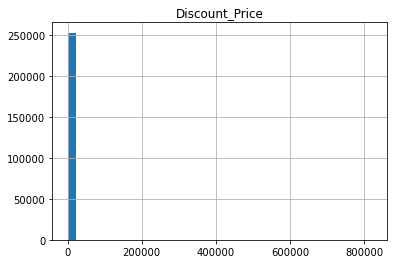

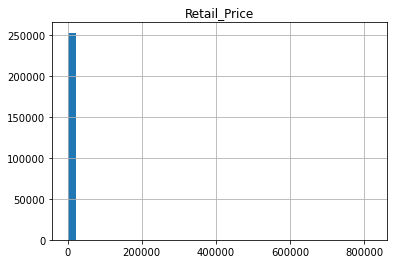

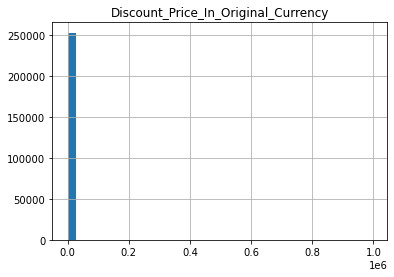

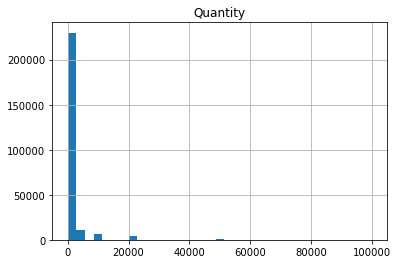

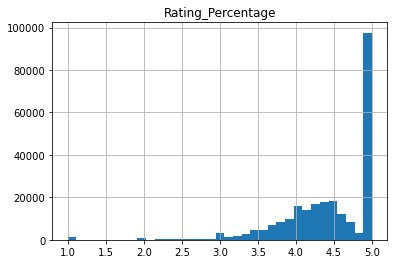

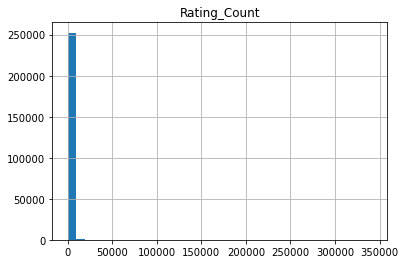

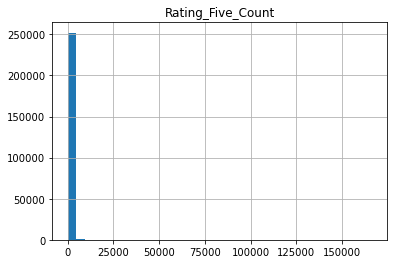

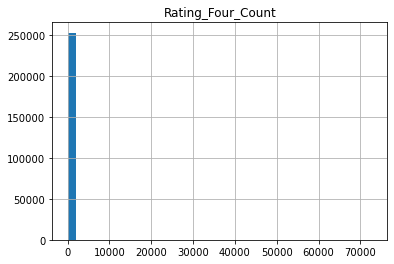

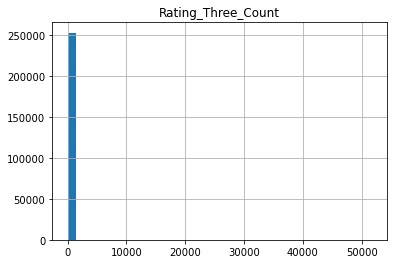

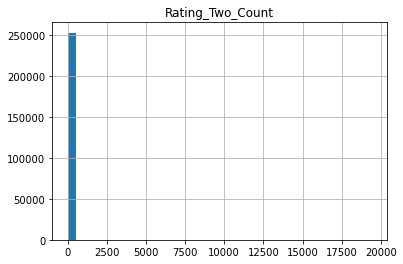

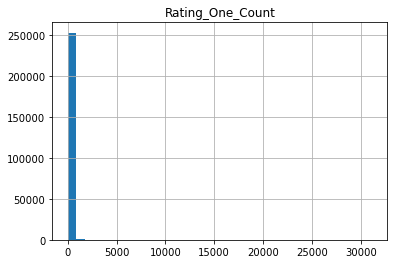

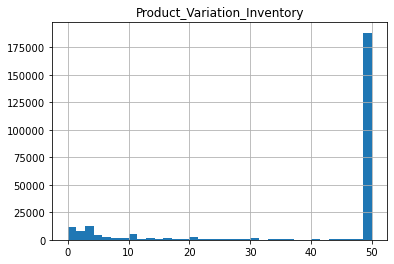

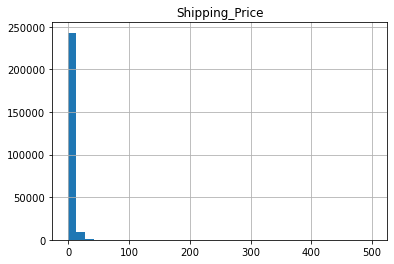

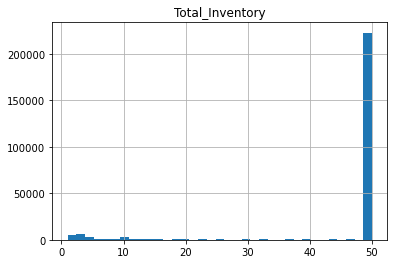

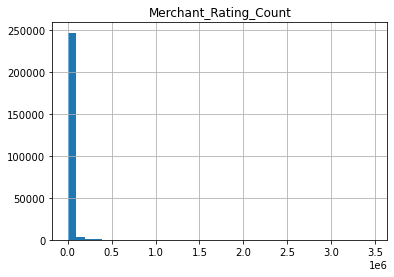

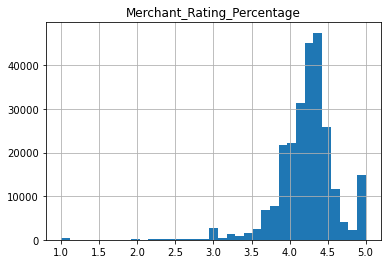

In [32]:
num = dt.select_dtypes(include=np.number)  # Get numeric columns
names = num.columns
for i in names:
    dt.hist(column=i, bins=35)

#### Boxplots to check outliers

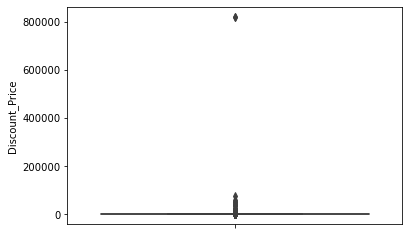

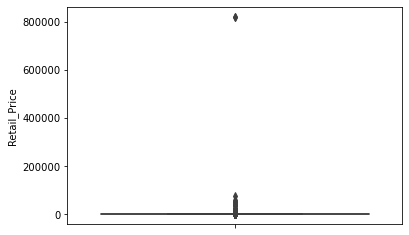

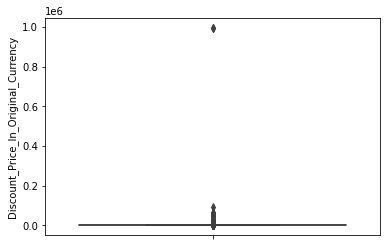

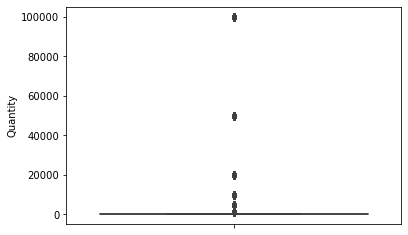

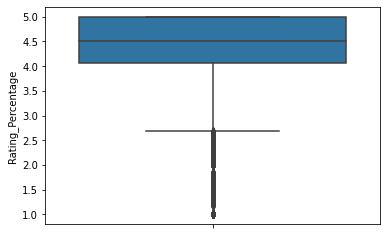

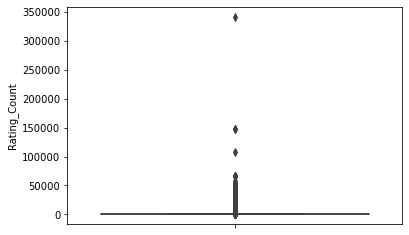

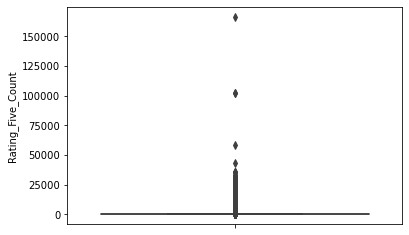

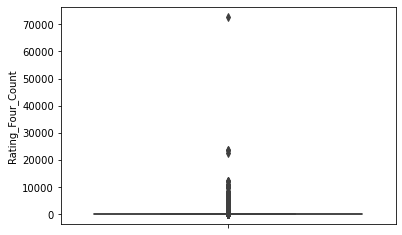

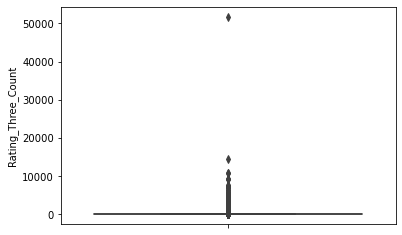

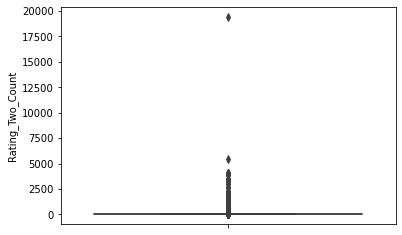

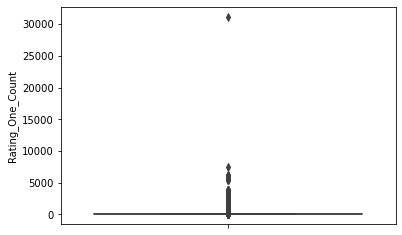

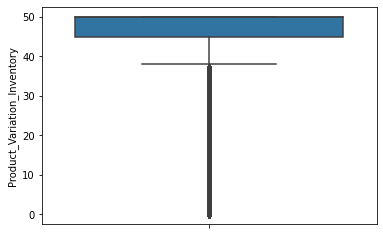

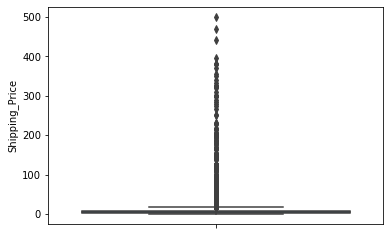

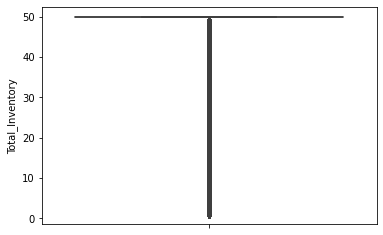

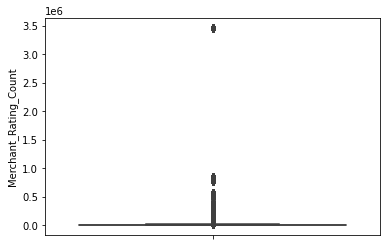

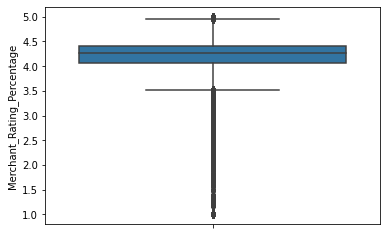

In [33]:
#boxplot
for i in names:
    sns.boxplot(y=i,data=dt)
    plt.show()

### Statistical Summary

In [34]:
dt.describe()

,Discount_Price,Retail_Price,Discount_Price_In_Original_Currency,Quantity,Rating_Percentage,Rating_Count,Rating_Five_Count,Rating_Four_Count,Rating_Three_Count,Rating_Two_Count,Rating_One_Count,Product_Variation_Inventory,Shipping_Price,Total_Inventory,Merchant_Rating_Count,Merchant_Rating_Percentage
count,252992.000000,252992.000000,252992.000000,252992.000000,252992.000000,252992.000000,252992.000000,252992.000000,252992.000000,252992.000000,252992.000000,252992.000000,252992.000000,252992.000000,2.529920e+05,252992.000000
mean,47.124847,67.501047,55.524348,1272.655214,4.433497,295.946520,177.058733,51.670385,31.614015,12.763894,22.839461,39.777309,5.522574,45.445409,1.472733e+04,4.226202
std,2346.807866,2350.257302,2844.361585,5418.591478,0.624511,1492.602381,878.601611,277.514736,183.136425,72.966795,121.214023,18.413327,8.647690,13.114921,1.083512e+05,0.399144
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.020000,1.000000,0.000000e+00,1.000000
25%,4.830000,7.000000,5.720000,1.000000,4.073684,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,2.000000,50.000000,2.030000e+02,4.054591
50%,11.000000,16.000000,13.000000,10.000000,4.500000,10.000000,6.000000,1.000000,1.000000,0.000000,1.000000,50.000000,4.000000,50.000000,1.501000e+03,4.266265
75%,22.000000,39.000000,25.990000,10.000000,5.000000,117.000000,69.000000,19.000000,11.000000,4.000000,9.000000,50.000000,8.000000,50.000000,7.721000e+03,4.415367
max,820972.000000,820972.000000,995366.000000,100000.000000,5.000000,341573.000000,166423.000000,72798.000000,51762.000000,19437.000000,31153.000000,50.000000,500.000000,50.000000,3.464509e+06,5.000000


#### Removing the outliers

<AxesSubplot:ylabel='Frequency'>

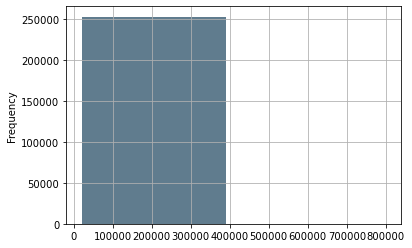

In [35]:
dt['Discount_Price'].plot.hist(grid=True, bins=2, rwidth=0.9,
                   color='#607c8e')

In [36]:
#Removing outliers form Discount_Price
dt = dt[(dt['Discount_Price'] < 200000)]

<AxesSubplot:ylabel='Frequency'>

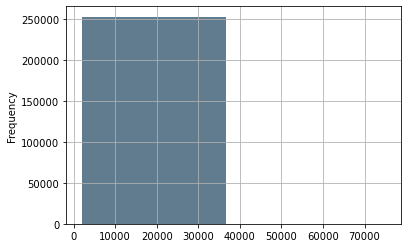

In [37]:
dt['Retail_Price'].plot.hist(grid=True, bins=2, rwidth=0.9,
                   color='#607c8e')

In [38]:
#dropping rows where price are zero
print("Before: ",len(dt))
dt = dt[dt.Retail_Price != 0]
print("After: ",len(dt))

Before:  252990
After:  252796


<AxesSubplot:>

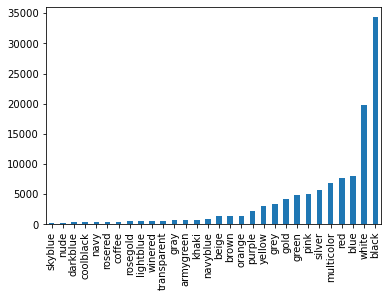

In [79]:
df['Product_Color'].value_counts(ascending=True).tail(30).plot(kind='bar')

In [40]:
#Keep product color which are valid
print("Before: ",len(dt))
list_color = ['a','abyss','14ktgold','abc','0.7fl.oz','100ml','3.4fl.oz','20ml','2beige']
for i in list_color:
    dt = dt[dt.Product_Color != i]
print("After: ",len(dt))

Before:  252796
After:  252717


<AxesSubplot:>

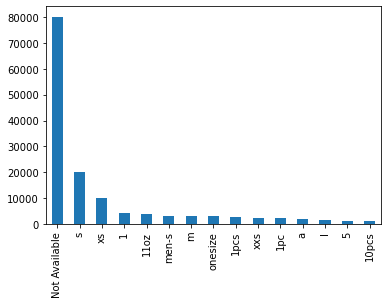

In [41]:
dt['Product_Size'].value_counts().head(15).plot(kind='bar')

In [42]:
#removing values where only numbers are present in product size
print("Before: ",len(dt))
dt = dt[dt['Product_Size'].apply(lambda x: str(x).isalnum())]
print("After: ",len(dt))

Before:  252717
After:  130840


### Duplicate value check

In [43]:
#Before
dt.shape

(130840, 36)

In [44]:
dt.drop_duplicates(keep=False,inplace=True)

In [45]:
#After
dt.shape

(130840, 36)

## Getting data ready for visualization

In [46]:
dt.head()

,Original_Title,Discount_Price,Discount_Currency,Retail_Price,Retail_Currency,Discount_Price_In_Original_Currency,Quantity,Rating_Percentage,Rating_Count,Rating_Five_Count,...,Merchant_Subtitle,Merchant_Rating_Count,Merchant_Rating_Percentage,Merchant_Id,Product_Url,Product_Picture,Product_Id,Product_Category,Order_Date,Title
0,100ML 24K Gold Skin Care Anti Aging Collagen H...,10.00,EUR,10.0,EUR,12.00,10.0,4.473684,19.0,14.0,...,"(57,021 notes)",57021.0,4.300854,57b327ca18c55618cdc64f8f,https://www.wish.com/c/5d84a1d1dda3ef0f306dfc50,https://canary.contestimg.wish.com/api/webimag...,5d84a1d1dda3ef0f306dfc50,aging,2020-02-09,24K Gold Skin Care Anti Aging Collagen Hyalur...
3,3D V-Line Face-Lift Firming Skin Anti Aging do...,5.00,EUR,5.0,EUR,5.00,1000.0,4.190476,168.0,100.0,...,92 % avis positifs (287 notes),287.0,4.372822,5ebfa16329e7860c32d8634d,https://www.wish.com/c/5f327be61b746c003ff583ac,https://canary.contestimg.wish.com/api/webimag...,5f327be61b746c003ff583ac,aging,2021-04-29,D VLine FaceLift Firming Skin Anti Aging Doubl...
4,Snail Essence Face Cream Hyaluronic Acid Anti-...,7.00,EUR,7.0,EUR,8.00,10.0,5.000000,1.0,1.0,...,88 % avis positifs (200 notes),200.0,4.245000,5e13450f29e7864c03e95ff5,https://www.wish.com/c/5fed3d117ef51e7251f7f726,https://canary.contestimg.wish.com/api/webimag...,5fed3d117ef51e7251f7f726,aging,2020-09-24,Snail Essence Face Cream Hyaluronic Acid AntiA...
12,Newest Efficient Skin Lightening Whitening Cre...,3.87,EUR,83.0,EUR,4.69,1000.0,4.082840,338.0,187.0,...,"88 % avis positifs (19,363 notes)",19363.0,4.157672,552c970a1a2be01404727003,https://www.wish.com/c/5c496f739740a93021606be2,https://canary.contestimg.wish.com/api/webimag...,5c496f739740a93021606be2,aging,2020-08-06,Efficient Skin Lightening Whitening Cream Spo...
13,10ml/20ml/30ml/50ml Black Castor Oil Nourish C...,5.00,EUR,5.0,EUR,5.00,10.0,5.000000,2.0,2.0,...,90 % avis positifs (827 notes),827.0,4.246675,5ef05a23660290f40a17c162,https://www.wish.com/c/5febe87000168e64d033df99,https://canary.contestimg.wish.com/api/webimag...,5febe87000168e64d033df99,aging,2021-10-21,Black Castor Oil Nourish Castor Oil Hair Grow...


### Dropping the columns not required for analysis

In [47]:
#dropping columns not needed for analusis
dt.drop('Original_Title', axis=1, inplace=True)
dt.drop('Has_Urgency_Banner', axis=1, inplace=True)
dt.drop('Urgency_Text', axis=1, inplace=True)
dt.drop('Product_Url', axis=1, inplace=True)
dt.drop('Product_Picture', axis=1, inplace=True)

In [48]:
data_info(dt)

Number of rows in dataset: 130840
Number of columns in dataset: 31
Columns in dataset:
Index(['Discount_Price', 'Discount_Currency', 'Retail_Price',
       'Retail_Currency', 'Discount_Price_In_Original_Currency', 'Quantity',
       'Rating_Percentage', 'Rating_Count', 'Rating_Five_Count',
       'Rating_Four_Count', 'Rating_Three_Count', 'Rating_Two_Count',
       'Rating_One_Count', 'Product_Color', 'Product_Size',
       'Product_Variation_Inventory', 'Shipping_Type', 'Shipping_Price',
       'Express_Shipping', 'Total_Inventory', 'Origin_Country',
       'Merchant_Title', 'Merchant_Name', 'Merchant_Subtitle',
       'Merchant_Rating_Count', 'Merchant_Rating_Percentage', 'Merchant_Id',
       'Product_Id', 'Product_Category', 'Order_Date', 'Title'],
      dtype='object')


,Discount_Price,Discount_Currency,Retail_Price,Retail_Currency,Discount_Price_In_Original_Currency,Quantity,Rating_Percentage,Rating_Count,Rating_Five_Count,Rating_Four_Count,...,Merchant_Title,Merchant_Name,Merchant_Subtitle,Merchant_Rating_Count,Merchant_Rating_Percentage,Merchant_Id,Product_Id,Product_Category,Order_Date,Title
0,10.00,EUR,10.0,EUR,12.00,10.0,4.473684,19.0,14.0,2.0,...,shine03,shine03,"(57,021 notes)",57021.0,4.300854,57b327ca18c55618cdc64f8f,5d84a1d1dda3ef0f306dfc50,aging,2020-02-09,24K Gold Skin Care Anti Aging Collagen Hyalur...
3,5.00,EUR,5.0,EUR,5.00,1000.0,4.190476,168.0,100.0,34.0,...,Huoyifang,huoyifang,92 % avis positifs (287 notes),287.0,4.372822,5ebfa16329e7860c32d8634d,5f327be61b746c003ff583ac,aging,2021-04-29,D VLine FaceLift Firming Skin Anti Aging Doubl...
4,7.00,EUR,7.0,EUR,8.00,10.0,5.000000,1.0,1.0,0.0,...,caiyouhong6699,caiyouhong6699,88 % avis positifs (200 notes),200.0,4.245000,5e13450f29e7864c03e95ff5,5fed3d117ef51e7251f7f726,aging,2020-09-24,Snail Essence Face Cream Hyaluronic Acid AntiA...
12,3.87,EUR,83.0,EUR,4.69,1000.0,4.082840,338.0,187.0,63.0,...,zhangjia,zhangjia,"88 % avis positifs (19,363 notes)",19363.0,4.157672,552c970a1a2be01404727003,5c496f739740a93021606be2,aging,2020-08-06,Efficient Skin Lightening Whitening Cream Spo...
13,5.00,EUR,5.0,EUR,5.00,10.0,5.000000,2.0,2.0,0.0,...,jiajialop,jiajialop,90 % avis positifs (827 notes),827.0,4.246675,5ef05a23660290f40a17c162,5febe87000168e64d033df99,aging,2021-10-21,Black Castor Oil Nourish Castor Oil Hair Grow...
14,3.00,EUR,3.0,EUR,3.00,10.0,3.870370,54.0,26.0,11.0,...,kangyanlidezhanghao,kangyanlidezhanghao,"90 % avis positifs (4,976 notes)",4976.0,4.202371,59105b17864e5c4e1bbcb50d,5cda9f4d85d96d1960ee3eac,aging,2020-11-23,Body Wrinkle Remover AntiAging Moisturizer Ins...
17,3.94,EUR,4.0,EUR,4.78,10.0,5.000000,1.0,1.0,0.0,...,PKGoodGoods,pkgoodgoods,"(4,720 notes)",4720.0,4.243432,5b891b8f2eb51f18073ab2e4,5facec5ebce7abee342570b2,aging,2021-08-23,K Gold Hyaluronic Acid Facial Serum Skin Care ...
19,4.02,EUR,5.0,EUR,4.87,10.0,4.378788,66.0,41.0,15.0,...,Uilzstore,uilzstore,"84 % avis positifs (3,764 notes)",3764.0,4.039054,5d661cd163ad460bc20da8ac,5f0fc20205dd3712792c0491,aging,2021-03-02,assage Eye Cream Collagen Essence Rolling Eye ...
21,3.16,EUR,4.0,EUR,3.83,10.0,4.466667,15.0,12.0,0.0,...,xiuaoxiaoyan,xiuaoxiaoyan,"88% положительных отзывов (14,679 рейтинг)",14679.0,4.152054,5a4237277dee4a264f357c04,60019bc88810906c8b61c849,aging,2020-05-18,Face Skin Care Anti Wrinkle Whitening Facial ...
23,3.07,EUR,4.0,EUR,3.72,10.0,4.000000,6.0,4.0,0.0,...,xiuaoxiaoyan,xiuaoxiaoyan,"(14,679 notes)",14679.0,4.152054,5a4237277dee4a264f357c04,60068d589997b2cff0feb5e9,aging,2020-09-03,Hyaluronic Acid Essence Serum Skin Care Deep...


### Adding new columns (difference price, discount flag, discount percentage)

In [49]:
#creating a flag for discount
dt['Diff_Price'] =dt['Retail_Price'] - dt['Discount_Price']
dt['Discount_Flag'] = np.where(dt['Diff_Price'] > 1,1,0)
#Get discount percentage                             
dt['Discount_percentage'] =((dt['Retail_Price'] - dt['Discount_Price'])/dt['Retail_Price'])
dt['Discount_percentage'] = np.round(np.where(dt['Discount_percentage']>0,dt['Discount_percentage'],0),2)

In [50]:
dt.head()

,Discount_Price,Discount_Currency,Retail_Price,Retail_Currency,Discount_Price_In_Original_Currency,Quantity,Rating_Percentage,Rating_Count,Rating_Five_Count,Rating_Four_Count,...,Merchant_Rating_Count,Merchant_Rating_Percentage,Merchant_Id,Product_Id,Product_Category,Order_Date,Title,Diff_Price,Discount_Flag,Discount_percentage
0,10.00,EUR,10.0,EUR,12.00,10.0,4.473684,19.0,14.0,2.0,...,57021.0,4.300854,57b327ca18c55618cdc64f8f,5d84a1d1dda3ef0f306dfc50,aging,2020-02-09,24K Gold Skin Care Anti Aging Collagen Hyalur...,0.00,0,0.00
3,5.00,EUR,5.0,EUR,5.00,1000.0,4.190476,168.0,100.0,34.0,...,287.0,4.372822,5ebfa16329e7860c32d8634d,5f327be61b746c003ff583ac,aging,2021-04-29,D VLine FaceLift Firming Skin Anti Aging Doubl...,0.00,0,0.00
4,7.00,EUR,7.0,EUR,8.00,10.0,5.000000,1.0,1.0,0.0,...,200.0,4.245000,5e13450f29e7864c03e95ff5,5fed3d117ef51e7251f7f726,aging,2020-09-24,Snail Essence Face Cream Hyaluronic Acid AntiA...,0.00,0,0.00
12,3.87,EUR,83.0,EUR,4.69,1000.0,4.082840,338.0,187.0,63.0,...,19363.0,4.157672,552c970a1a2be01404727003,5c496f739740a93021606be2,aging,2020-08-06,Efficient Skin Lightening Whitening Cream Spo...,79.13,1,0.95
13,5.00,EUR,5.0,EUR,5.00,10.0,5.000000,2.0,2.0,0.0,...,827.0,4.246675,5ef05a23660290f40a17c162,5febe87000168e64d033df99,aging,2021-10-21,Black Castor Oil Nourish Castor Oil Hair Grow...,0.00,0,0.00


### Grouping the Proudct_color data based on color type

In [51]:
#Color type
dt['Product_Color'] = dt['Product_Color'].astype('str')
def color(col):
    if '&' in col:
        return 'dual'
    elif '+' in col:
        return 'dual'
    else:
        return col
    return col
dt['Product_Color_Type'] = dt['Product_Color']
dt['Product_Color_Type'] = dt['Product_Color_Type'].apply(color)

In [59]:
#Replacing the Colors
dt['Product_Color_Type'].replace('multicolor', 'other', inplace=True)
dt['Product_Color_Type'].replace(np.nan, 'other', inplace=True)
dt['Product_Color_Type'].replace('khaki', 'green', inplace=True)
dt['Product_Color_Type'].replace('gray', 'grey', inplace=True)
dt['Product_Color_Type'].replace('coffee', 'brown', inplace=True)
dt['Product_Color_Type'].replace('rose', 'red', inplace=True)
dt['Product_Color_Type'].replace('navy', 'blue', inplace=True)
dt['Product_Color_Type'].replace('ivory', 'white', inplace=True)
dt['Product_Color_Type'].replace('lightkhaki', 'green', inplace=True)
dt['Product_Color_Type'].replace('lightgray', 'grey', inplace=True)
dt['Product_Color_Type'].replace('violet', 'purple', inplace=True)
dt['Product_Color_Type'].replace('gold', 'yellow', inplace=True)
dt['Product_Color_Type'].replace('rosegold', 'red', inplace=True)
dt['Product_Color_Type'].replace('claret', 'red', inplace=True)

#Using fuzzywuzzy library to perform the color grouping
ref_list = ['black', 'brown', 'green','white','orange','brown','beige','grey','blue','yellow','red','dual','pink','purple','other']

#Getting unique colors from the Product_Color_Type column
inp_list = dt['Product_Color_Type'].unique().tolist()

#Creating score_sort, it returns the tuple
score_sort = [(x,) + i
             for x in inp_list 
             for i in process.extract(x, ref_list,scorer=fuzz.partial_ratio)]

#Create a dataframe from the tuples
similarity_sort = pd.DataFrame(score_sort, columns=['Product_Color_Type','new_color','score_sort'])
similarity_sort = similarity_sort[similarity_sort['score_sort']>90]

#merging the data frame 
dt1=pd.merge(dt,similarity_sort,on='Product_Color_Type', how='left')

#dropping duplicate id
#dt1=dt1.drop_duplicates('id')

dt1.shape

(132105, 37)

In [60]:
#replace missing values in new_color with other
dt1['new_color'].replace(np.nan, 'other', inplace=True)
#Dropping score_sort column
dt1 = dt1.drop('score_sort',1)
#dt_1=dt1[dt1['new_color'].isnull()]
dt1['new_color'].value_counts()
#14

C:\Users\kp728\AppData\Local\Temp/ipykernel_19536/2727461177.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dt1 = dt1.drop('score_sort',1)


other     62668
black     21674
white     13874
blue       6734
red        5646
green      4369
yellow     3809
grey       3370
pink       2910
brown      2250
dual       1642
purple     1448
beige       864
orange      847
Name: new_color, dtype: int64

In [61]:
#Renaming the column
dt1['New_Color'] = dt1['new_color']

In [62]:
#dropping the columns
dt1.drop('new_color', axis=1, inplace=True)
#dt1.drop('index', axis=1, inplace=True)


### Grouping the size 

In [68]:
dt1['Product_Size_Type'] = dt1['Product_Size']
#Creating the reference size list
ref_list = ['XXXS','XXS','XS','S', 'M','L','XL','XXL','XXXL']

#Getting the unique size in Product_Size_Type
inp_list = dt1['Product_Size_Type'].unique().tolist()

#Replacing the values
dt1['Product_Size_Type'].replace('3XL', 'XXXL', inplace=True)
dt1['Product_Size_Type'].replace('2XL', 'XXL', inplace=True)
dt1['Product_Size_Type'].replace('04-3XL', 'XXXL', inplace=True)

#Getting Score_sort
score_sort = [(x,) + i
             for x in inp_list 
             for i in process.extract(x, ref_list,scorer=fuzz.token_set_ratio)]
#Create a dataframe from the tuples
similarity_sort = pd.DataFrame(score_sort, columns=['Product_Size_Type','size_id','score_sort'])
similarity_sort = similarity_sort[similarity_sort['score_sort']>90]

#Merging the dataframe
dt2=pd.merge(dt1,similarity_sort,on='Product_Size_Type', how='left')

#Dropping the duplicate id
#dt2=dt2.drop_duplicates('id')

In [69]:
#Replacing Null values with other in size_id
dt2['size_id'].replace(np.nan, 'other', inplace=True)
dt2['Product_Size_New'] = dt2['size_id']

In [70]:
#Dropping the columns
dt2.drop('size_id', axis=1, inplace=True)
#dt2.drop('id', axis=1, inplace=True)
#dt2.drop('level_0', axis=1, inplace=True)
dt2.drop('score_sort', axis=1, inplace=True)
dt2.drop('Product_Color_Type', axis=1, inplace=True)
dt2.drop('Product_Size', axis=1, inplace=True)
dt2.drop('Product_Color', axis=1, inplace=True)
dt2['Product_Size_New'].value_counts()
#10

other    93540
S        20438
XS       10078
M         3139
XXS       2511
L         1464
XL         385
XXL        264
XXXS       184
XXXL       102
Name: Product_Size_New, dtype: int64

In [71]:
missing_value_percentage(dt2)

,column_name,percent_missing
Discount_Price,Discount_Price,0.0
Discount_Currency,Discount_Currency,0.0
Retail_Price,Retail_Price,0.0
Retail_Currency,Retail_Currency,0.0
Discount_Price_In_Original_Currency,Discount_Price_In_Original_Currency,0.0
Quantity,Quantity,0.0
Rating_Percentage,Rating_Percentage,0.0
Rating_Count,Rating_Count,0.0
Rating_Five_Count,Rating_Five_Count,0.0
Rating_Four_Count,Rating_Four_Count,0.0


### Rearranging the columns

In [72]:
master_data = dt2.reindex(columns=['Title','Product_Id','Product_Category','Retail_Price','Retail_Currency',
                                   'Discount_Price', 'Discount_Currency', 'Discount_Price_In_Original_Currency', 'Quantity', 
                                   'New_Color', 'Product_Size_New','Rating_Percentage', 'Rating_Count', 'Rating_Five_Count',
                                   'Rating_Four_Count', 'Rating_Three_Count', 'Rating_Two_Count',
                                   'Rating_One_Count', 'Product_Variation_Inventory', 'Shipping_Type', 'Shipping_Price',
                                   'Express_Shipping', 'Total_Inventory', 'Origin_Country','Merchant_Id',
                                   'Merchant_Title', 'Merchant_Name', 'Merchant_Subtitle',
                                   'Merchant_Rating_Count', 'Merchant_Rating_Percentage',
                                   'Order_Date',  'Diff_Price',
                                   'Discount_Flag', 'Discount_percentage'])

In [73]:
data_info(dt2)

Number of rows in dataset: 132105
Number of columns in dataset: 35
Columns in dataset:
Index(['Discount_Price', 'Discount_Currency', 'Retail_Price',
       'Retail_Currency', 'Discount_Price_In_Original_Currency', 'Quantity',
       'Rating_Percentage', 'Rating_Count', 'Rating_Five_Count',
       'Rating_Four_Count', 'Rating_Three_Count', 'Rating_Two_Count',
       'Rating_One_Count', 'Product_Variation_Inventory', 'Shipping_Type',
       'Shipping_Price', 'Express_Shipping', 'Total_Inventory',
       'Origin_Country', 'Merchant_Title', 'Merchant_Name',
       'Merchant_Subtitle', 'Merchant_Rating_Count',
       'Merchant_Rating_Percentage', 'Merchant_Id', 'Product_Id',
       'Product_Category', 'Order_Date', 'Title', 'Diff_Price',
       'Discount_Flag', 'Discount_percentage', 'New_Color',
       'Product_Size_Type', 'Product_Size_New'],
      dtype='object')


,Discount_Price,Discount_Currency,Retail_Price,Retail_Currency,Discount_Price_In_Original_Currency,Quantity,Rating_Percentage,Rating_Count,Rating_Five_Count,Rating_Four_Count,...,Product_Id,Product_Category,Order_Date,Title,Diff_Price,Discount_Flag,Discount_percentage,New_Color,Product_Size_Type,Product_Size_New
0,10.00,EUR,10.0,EUR,12.00,10.0,4.473684,19.0,14.0,2.0,...,5d84a1d1dda3ef0f306dfc50,aging,2020-02-09,24K Gold Skin Care Anti Aging Collagen Hyalur...,0.00,0,0.00,other,100ml,other
1,5.00,EUR,5.0,EUR,5.00,1000.0,4.190476,168.0,100.0,34.0,...,5f327be61b746c003ff583ac,aging,2021-04-29,D VLine FaceLift Firming Skin Anti Aging Doubl...,0.00,0,0.00,white,1pc,other
2,7.00,EUR,7.0,EUR,8.00,10.0,5.000000,1.0,1.0,0.0,...,5fed3d117ef51e7251f7f726,aging,2020-09-24,Snail Essence Face Cream Hyaluronic Acid AntiA...,0.00,0,0.00,other,packof1,other
3,3.87,EUR,83.0,EUR,4.69,1000.0,4.082840,338.0,187.0,63.0,...,5c496f739740a93021606be2,aging,2020-08-06,Efficient Skin Lightening Whitening Cream Spo...,79.13,1,0.95,other,30g,other
4,5.00,EUR,5.0,EUR,5.00,10.0,5.000000,2.0,2.0,0.0,...,5febe87000168e64d033df99,aging,2021-10-21,Black Castor Oil Nourish Castor Oil Hair Grow...,0.00,0,0.00,other,10ml,other
5,3.00,EUR,3.0,EUR,3.00,10.0,3.870370,54.0,26.0,11.0,...,5cda9f4d85d96d1960ee3eac,aging,2020-11-23,Body Wrinkle Remover AntiAging Moisturizer Ins...,0.00,0,0.00,other,10g,other
6,3.94,EUR,4.0,EUR,4.78,10.0,5.000000,1.0,1.0,0.0,...,5facec5ebce7abee342570b2,aging,2021-08-23,K Gold Hyaluronic Acid Facial Serum Skin Care ...,0.06,0,0.02,other,10ml,other
7,4.02,EUR,5.0,EUR,4.87,10.0,4.378788,66.0,41.0,15.0,...,5f0fc20205dd3712792c0491,aging,2021-03-02,assage Eye Cream Collagen Essence Rolling Eye ...,0.98,0,0.20,other,15ml,other
8,3.16,EUR,4.0,EUR,3.83,10.0,4.466667,15.0,12.0,0.0,...,60019bc88810906c8b61c849,aging,2020-05-18,Face Skin Care Anti Wrinkle Whitening Facial ...,0.84,0,0.21,other,3g,other
9,3.07,EUR,4.0,EUR,3.72,10.0,4.000000,6.0,4.0,0.0,...,60068d589997b2cff0feb5e9,aging,2020-09-03,Hyaluronic Acid Essence Serum Skin Care Deep...,0.93,0,0.23,other,3g,other


In [74]:
col_info(master_data)

 Title : object : 85785 levels
[] ...

 Product_Id : object : 96045 levels
['5d84a1d1dda3ef0f306dfc50', '5f327be61b746c003ff583ac'] ...

 Product_Category : object : 315 levels
['aging', 'argile', 'arizona', 'arthritis', 'artificial', 'awesome', 'bamboo'] ...

 Retail_Price : float64 : 1094 levels
[10.0, 5.0, 7.0, 83.0, 3.0, 4.0, 26.0, 40.0, 86.0, 13.0, 17.0, 34.0] ...

 Retail_Currency : object : 3 levels
['EUR', 'USD', 'CHF'] 

 Discount_Price : float64 : 1111 levels
[10.0, 5.0, 7.0, 3.87, 3.0, 3.94, 4.02, 3.16, 3.07, 3.97, 2.27, 3.99] ...

 Discount_Currency : object : 3 levels
['EUR', 'USD', 'CHF'] 

 Discount_Price_In_Original_Currency : float64 : 2205 levels
[12.0, 5.0, 8.0, 4.69, 3.0, 4.78, 4.87, 3.83, 3.72, 4.8100000000000005] ...

 Quantity : float64 : 17 levels
[10.0, 1000.0, 10000.0, 7.0, 20000.0, 5000.0, 2.0, 0.0, 6.0, 3.0, 1.0] ...

 New_Color : object : 14 levels
['other', 'white', 'red', 'purple', 'blue', 'beige', 'pink', 'green', 'yellow', 'black'] ...

 Product_Size_Ne

### Converting dataframe into CSV

In [ ]:
master_data.to_csv("C:/Users/kp728/Documents/Sem3/CPSC/Project/Master_Cleaned.csv")

In [85]:
df['Product_Color'].nunique()

1217

In [86]:
df['Product_Size'].nunique()

29972